# **IMPORT LIBRARY**

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')


# **FILE UPLOAD**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (4).xlsx



    *   with panda library we are able to read out our excel file as a DATAFRAME object.
    *   we can also show out data type using the second line method



In [ ]:
data = pd.read_excel(r'data.xlsx')
print(f"Type of data: {type(data)}")
data.columns

Type of data: <class 'pandas.core.frame.DataFrame'>


Index(['Year', 'Y', 'Number of floors', 'Number of windows',
       'Number of balconies', 'Number of entrances', 'Number of colors used',
       'Color type', 'Distance between windows (minimum)',
       'Distance between windows (maximum)', 'Number of materials used',
       'Type of materials', 'Line type (curved and smooth)',
       'Roof line (continuous or discontinuous)', 'Form of windows',
       'Entrance form', 'Protrusion or indentation of the floor surface',
       'Ground floor bulge or indentation',
       'Protrusion or indentation of windows', 'General form of the building',
       'Opaque surface / transparent surface', 'Floor height / floor length',
       'Balcony length', 'Contrast', 'Different roof colors', 'Roofing line',
       'Separation of the roof from the building', 'Roof protrusion',
       'Use decorations on the roof', 'Building surface decorations',
       'Green wall', 'Garden', 'Mean', 'Varresult', 'Skewresult', 'Kurtresult',
       'Energy', 'Entropy'

    *   We use head() method to get a little bit of understanding about our data.
    *   After running this cell we can declare some of our values are missing! We need to deal with the missing values as well.


In [ ]:
data.head(15)

,Year,Y,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
0,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
1,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
2,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
3,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
4,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
5,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
6,94,15.4,6.0,15.0,0,2,3,7.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
7,94,15.4,6.0,15.0,0,2,3,7.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
8,94,15.4,6.0,15.0,0,2,3,7.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
9,94,15.4,6.0,15.0,0,2,3,NaN,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349


# **DISCRETIZATION**

    *   In this part we firstly section the scores that folks have given each house into 4 equal values 
        ranging from (0-11.125) , (11.125-22.25) , (22.25-33.375) , (33,375-45.5)  
    *   And then, we assign label to each category! We use an empty list (y) and then assign integer numbers between 0 and 3 to to every score.
    *   At last, we obtain a list of numbers indicating how many missing values we have gotten.





In [ ]:
feature = data.drop(columns=['Y','Year'])
# print(f'Show summary of Y columns: \n{data["Y"].describe()}')
y_ = data["Y"].values
y = []
for i in y_:
  if i < 11.125:
    y.append(0)
  elif i < 22.25:
    y.append(1)
  elif i < 33.375:
    y.append(2)
  else:
    y.append(3)
y = np.array(y)

feature.isna().sum()

Number of floors                                  1
Number of windows                                 1
Number of balconies                               0
Number of entrances                               0
Number of colors used                             0
Color type                                        1
Distance between windows (minimum)                0
Distance between windows (maximum)                1
Number of materials used                          1
Type of materials                                 0
Line type (curved and smooth)                     1
Roof line (continuous or discontinuous)           0
Form of windows                                   0
Entrance form                                     2
Protrusion or indentation of the floor surface    0
Ground floor bulge or indentation                 0
Protrusion or indentation of windows              2
General form of the building                      1
Opaque surface / transparent surface              0
Floor height

# **CHECK BALANCE**
    If our data is imbalanced, is better to give about the same amount of data from each label. 
    This makes sure that if our testing portion is imbalance, predict it accurately.

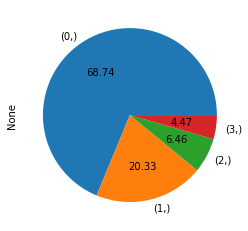

In [ ]:
pd.DataFrame(y).value_counts().plot.pie(autopct = '%0.2f')

# **PREPROCESSING**
 1) FILLING NaN VALUES

    sklearn has a method that fills the missing values with the methods that we desire. 
    We can merge the mean of the column as our assigned value, or in this case, use the most frequent value as assigned to our cell.

In [ ]:
for i in range (36):
  imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer=imputer.fit(feature.iloc[:,i:i+1])
  feature.iloc[:,i:i+1]=imputer.transform(feature.iloc[:,i:i+1])

x = feature.values

feature.isna().sum()

Number of floors                                  0
Number of windows                                 0
Number of balconies                               0
Number of entrances                               0
Number of colors used                             0
Color type                                        0
Distance between windows (minimum)                0
Distance between windows (maximum)                0
Number of materials used                          0
Type of materials                                 0
Line type (curved and smooth)                     0
Roof line (continuous or discontinuous)           0
Form of windows                                   0
Entrance form                                     0
Protrusion or indentation of the floor surface    0
Ground floor bulge or indentation                 0
Protrusion or indentation of windows              0
General form of the building                      0
Opaque surface / transparent surface              0
Floor height


    *  now we look out data once more to make sure everything is going pretty well.



In [ ]:
feature.head(15)

,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),Number of materials used,Type of materials,...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
0,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,0,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
1,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,0,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
2,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,1,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
3,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,1,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
4,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,2,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
5,6.0,15.0,0,2,3,3.0,1.9,1.9,3.0,2,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
6,6.0,15.0,0,2,3,7.0,1.9,1.9,3.0,0,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
7,6.0,15.0,0,2,3,7.0,1.9,1.9,3.0,0,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
8,6.0,15.0,0,2,3,7.0,1.9,1.9,3.0,1,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349
9,6.0,15.0,0,2,3,1.0,1.9,1.9,3.0,1,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,0.000001,0.008411,7.108349


 2) STANDARDIZATION / NORMALIZATION
 
      both of the methods can be used to make the range of our data fall in either [0,1] or [-1,1] or make the mean square error=0
      in this case, I used standardization technique.

In [ ]:
# x = preprocessing.normalize(feature)
x = StandardScaler().fit_transform(x)

# **OVER-SAMPLING**

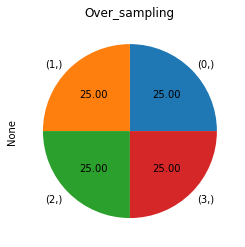

In [ ]:
from imblearn.over_sampling import RandomOverSampler

process = feature.values
# sample_strategy = {0:1, 1:1, 2:1, 3:1}
rus = RandomOverSampler(
    sampling_strategy={
        0: 1522,
        1: 1522,
        2: 1522,
        3: 1522
    },
    random_state=42
)
X_res, y_res = rus.fit_resample(process, y)

ax = pd.DataFrame(y_res).value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('Over_sampling')


# **DATA SPLIT**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=4, shuffle=True)


# **KNN ALGORITHM**

In [ ]:
from inspect import modulesbyfile
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
model = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
model.fit(x_train, y_train)

#Predict the response for test dataset
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# ###SVM MODEL####
# from sklearn import metrics
# model = svm.SVC(kernel='rbf', gamma='auto', C=2)
# model.fit(x_train, y_train)
# y_test_pred = model.predict(x_test)
# y_train_pred = model.predict(x_train)
# print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9967159277504105


# **TEST & PREDICTION**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       461
           1       0.99      1.00      1.00       441
           2       0.99      1.00      1.00       455
           3       1.00      1.00      1.00       470

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



# **BALANCE OR IMBALANCE?**

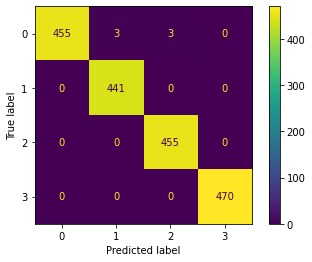

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()

# **FIT OR OVERFIT?**

>1, train: 1.000, test: 0.997
>2, train: 1.000, test: 0.997
>3, train: 1.000, test: 0.997
>4, train: 1.000, test: 0.997
>5, train: 1.000, test: 0.997
>6, train: 1.000, test: 0.997
>7, train: 1.000, test: 0.997
>8, train: 1.000, test: 0.997
>9, train: 1.000, test: 0.997
>10, train: 1.000, test: 0.997
>11, train: 1.000, test: 0.997
>12, train: 1.000, test: 0.997
>13, train: 1.000, test: 0.997
>14, train: 1.000, test: 0.997
>15, train: 1.000, test: 0.997
>16, train: 1.000, test: 0.997
>17, train: 1.000, test: 0.997
>18, train: 1.000, test: 0.997
>19, train: 1.000, test: 0.997
>20, train: 1.000, test: 0.997


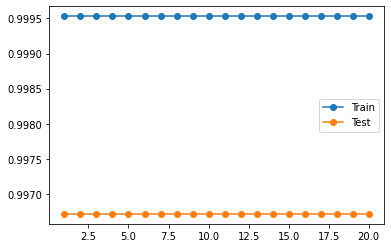

In [ ]:
from sklearn.metrics import accuracy_score
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
 train_acc = accuracy_score(y_train, y_train_pred)
 train_scores.append(train_acc)

 # evaluate on the test dataset
 test_acc = accuracy_score(y_test, y_test_pred)
 test_scores.append(test_acc)
 
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()